In [20]:
import pandas as pd

# Caminho para o arquivo CSV
csv_file_path = '/content/all_movies 2.csv'
# Caminho para o arquivo XLSX
xlsx_file_path = '/content/all_movies 2.xlsx'

# Ler o arquivo CSV
# Added the names parameter to explicitly name the columns
df = pd.read_csv(csv_file_path, encoding='utf-8', on_bad_lines='skip', names=['sinopse'])

# Salvar como arquivo Excel
df.to_excel(xlsx_file_path, index=False, engine='openpyxl')

print(f"Arquivo CSV convertido e salvo como XLSX em '{xlsx_file_path}'.")

Arquivo CSV convertido e salvo como XLSX em '/content/all_movies 2.xlsx'.


In [23]:
import pandas as pd

# Caminho para o arquivo XLSX
xlsx_file_path = '/content/all_movies 2.xlsx'

# Ler o arquivo Excel
df = pd.read_excel(xlsx_file_path, engine='openpyxl')

# Mostrar as primeiras linhas do DataFrame para verificar os dados
print(df.head())


                                             sinopse
0  title_pt;title_en;year;rating;genre;sinopse;;;;;;
1  Barbie;Barbie;2023;7.4;Aventura;Viver na Terra...
2  Um Sonho de Liberdade;1. The Shawshank Redempt...
3  O Poderoso Chefão;2. The Godfather;1972;9.2;Po...
4  Batman: O Cavaleiro das Trevas;3. The Dark Kni...


                                             sinopse
0  title_pt;title_en;year;rating;genre;sinopse;;;;;;
1  Barbie;Barbie;2023;7.4;Aventura;Viver na Terra...
2  Um Sonho de Liberdade;1. The Shawshank Redempt...
3  O Poderoso Chefão;2. The Godfather;1972;9.2;Po...
4  Batman: O Cavaleiro das Trevas;3. The Dark Kni...
Index(['sinopse'], dtype='object')
Silhouette Score (Sinopses): 0.0011406478373197585


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (Combinado): 0.0011370169987614497


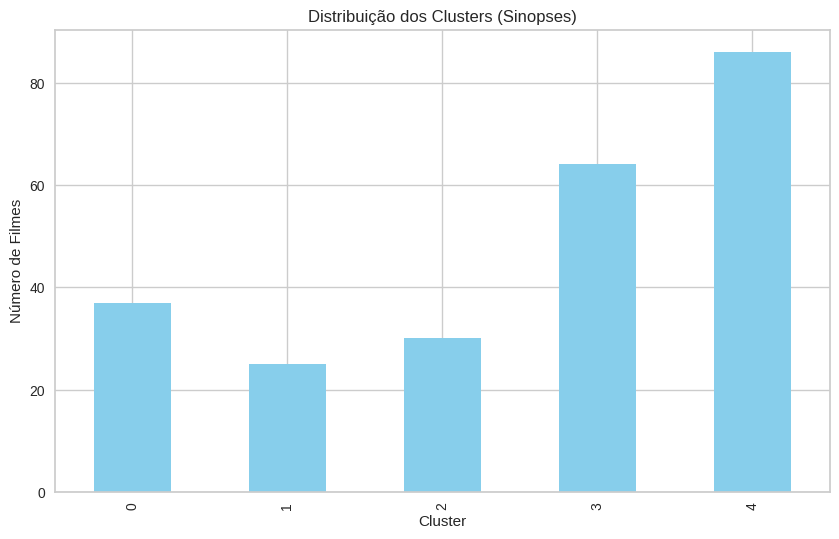

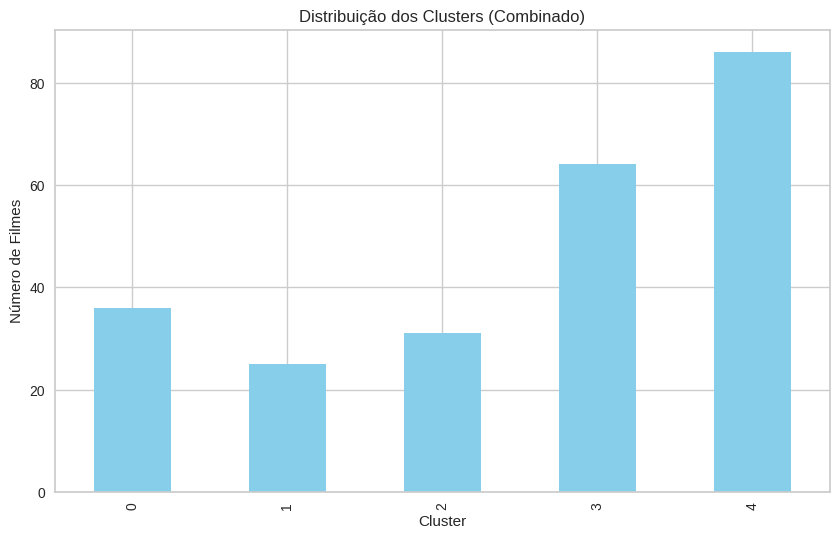

In [22]:
# Importações necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Função para carregar dados e tratar possíveis erros
def load_data(file_path):
    try:
        # Tenta carregar o arquivo XLSX
        df = pd.read_excel(file_path, engine='openpyxl')
    except Exception as e:
        raise Exception(f"Não foi possível carregar o arquivo XLSX. Erro: {e}")
    return df

# Carregar dados
df = load_data('/content/all_movies 2.xlsx')

# Verificar a estrutura do DataFrame
print(df.head())
print(df.columns)

# Pré-processamento de sinopses
def preprocess_sinopses(sinopses):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    return vectorizer.fit_transform(sinopses)

# Pré-processamento das características numéricas
# Removed preprocess_numeric_features function as 'rating' and 'year' columns are not available
# Modelo 1: Usando apenas sinopses vetorizadas
X_sinopses = preprocess_sinopses(df['sinopse'])
kmeans_sinopses = KMeans(n_clusters=5, random_state=42)
labels_sinopses = kmeans_sinopses.fit_predict(X_sinopses)
df['cluster_sinopses'] = labels_sinopses
silhouette_sinopses = silhouette_score(X_sinopses, labels_sinopses)
print(f'Silhouette Score (Sinopses): {silhouette_sinopses}')

# Modelo 2: Usando apenas sinopses vetorizadas - as características numéricas não estão disponíveis
X_combined = X_sinopses.toarray() # Removed X_numeric from hstack
kmeans_combined = KMeans(n_clusters=5, random_state=42)
labels_combined = kmeans_combined.fit_predict(X_combined)
df['cluster_combined'] = labels_combined
silhouette_combined = silhouette_score(X_combined, labels_combined)
print(f'Silhouette Score (Combinado): {silhouette_combined}')

# Visualização dos clusters
def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(10, 6))
    df[cluster_col].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Número de Filmes')
    plt.show()

plot_clusters(df, 'cluster_sinopses', 'Distribuição dos Clusters (Sinopses)')
plot_clusters(df, 'cluster_combined', 'Distribuição dos Clusters (Combinado)')

# Exportar resultados
df.to_csv('/content/imdb_clusters.csv', index=False)